# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [60]:
import torch
import torchvision
# import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

### Load CIFAR 10 Dataset

In [61]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


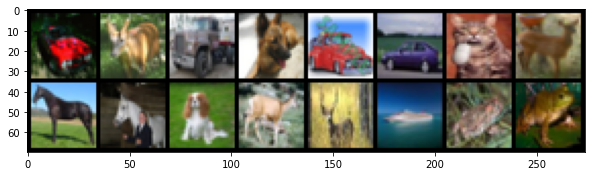

In [62]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

In [63]:
# Model definition
class FullyConnectedAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(3072, 1024),
            torch.nn.ReLU(),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(1024, 3072),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x=x.reshape(-1,3072)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.reshape(-1,3,32,32)
        return decoded
        # return decoded


In [64]:
model = FullyConnectedAutoencoder().cuda()


In [65]:
criterion = nn.MSELoss()


In [66]:

optimizer = torch.optim.Adam(model.parameters())  


In [67]:
# model.cpu()
for epoch in range(10):
  running_loss = 0.0
  for i, (inputs, _) in enumerate(trainloader, 0):
    inputs = Variable(inputs)
    inputs =inputs.cuda()
    # ============ Forward ============
    outputs = model(inputs)
    loss = criterion(outputs, inputs)
    # ============ Backward ============
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # ============ Logging ============
    running_loss += loss.data
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(model.state_dict(), "autoencoder1.pt")


[1,  2000] loss: 0.025
[2,  2000] loss: 0.012
[3,  2000] loss: 0.011
[4,  2000] loss: 0.011
[5,  2000] loss: 0.011
[6,  2000] loss: 0.011
[7,  2000] loss: 0.011
[8,  2000] loss: 0.011
[9,  2000] loss: 0.011
[10,  2000] loss: 0.011
Finished Training
Saving Model...


In [68]:
model.load_state_dict(torch.load("/content/autoencoder1.pt"))

<All keys matched successfully>

In [69]:
model.cpu()

FullyConnectedAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=1024, out_features=3072, bias=True)
    (1): Sigmoid()
  )
)

GroundTruth:    cat  ship  ship plane  frog


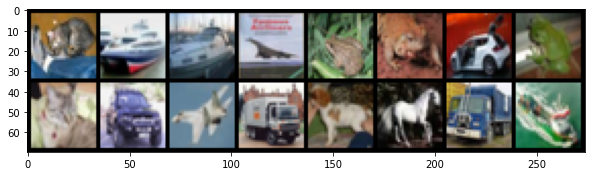

torch.Size([16, 3, 32, 32])
Reconstructed image
torch.Size([16, 3, 32, 32])


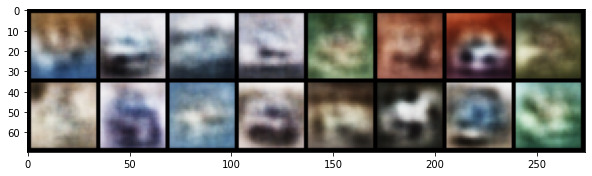

In [70]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))
# imshow(torchvision.utils.make_grid(images))

# images.shape

images = Variable(images)
# images = images.cpu()
# images.flatten()
# images=images.reshape(3072)

# images.shape
print(images.shape)


print("Reconstructed image")
decoded_imgs = model(images)
# decoded_imgs = decoded_imgs.cpu()
# decoded_imgs=decoded_imgs.reshape(3*32*32)
# decoded_imgs=decoded_imgs.unflatten(-1,(3,32,32))

print(decoded_imgs.shape)
imshow(torchvision.utils.make_grid(decoded_imgs.data))

In [71]:
# encoder and decoder is combination of convolution layers + fully connected layers

class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]


        self.encoder = nn.Sequential(
            nn.Conv2d(3, 12, kernel_size=5, stride=2),
            nn.ReLU(True),
            nn.Conv2d(12, 2*12, kernel_size=5,  stride=2), # 16x16 => 8x8
            nn.ReLU(),       
        )

        self.fc1 = nn.Linear(600, 512)
        self.fc4 = nn.Linear(512, 600)

        self.decoder = nn.Sequential(
            
            nn.ConvTranspose2d(2*12, 12, kernel_size=5,  stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(12, 3, kernel_size=8,  stride=2), # 16x16 => 8x8
        )
        


    def forward(self, x):
        encoded = self.encoder(x)
        # print(encoded.shape)
        encoded= encoded.reshape(-1,600)
        encoded = self.fc1(encoded)
        encoded = F.leaky_relu(encoded)
        decoded = self.fc4(encoded)
        decoded = F.leaky_relu(decoded)
        decoded = decoded.reshape(-1,24,5,5)
        decoded = self.decoder(decoded)
        decoded = torch.sigmoid(decoded)

        return encoded, decoded



In [72]:
def print_model2(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model2():
  autoencoder2 = Autoencoder2().cuda()
  print_model2(autoencoder2.encoder, autoencoder2.decoder)
  return autoencoder2

In [73]:
autoencoder2 = create_model2()
# autoencoder2.cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder2.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(5, 5), stride=(2, 2))
  (1): ReLU(inplace=True)
  (2): Conv2d(12, 24, kernel_size=(5, 5), stride=(2, 2))
  (3): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(24, 12, kernel_size=(5, 5), stride=(2, 2))
  (1): ReLU(inplace=True)
  (2): ConvTranspose2d(12, 3, kernel_size=(8, 8), stride=(2, 2))
)



In [74]:
for epoch in range(10):
  running_loss = 0.0
  for i, (inputs, _) in enumerate(trainloader, 0):
    inputs = Variable(inputs)
    inputs= inputs.cuda()
    # print("hi")
    # print(inputs.shape)
    # ============ Forward ============
    encoded, outputs = autoencoder2(inputs)
    # print("bye")
    # print(outputs.shape)
    loss = criterion(outputs, inputs)
    # print(inputs.shape)
    # ============ Backward ============
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()	
    # ============ Logging ============
    running_loss += loss.data
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
      
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder2.state_dict(), "autoencoder2.pt")

[1,  2000] loss: 0.022
[2,  2000] loss: 0.012
[3,  2000] loss: 0.011
[4,  2000] loss: 0.010
[5,  2000] loss: 0.009
[6,  2000] loss: 0.009
[7,  2000] loss: 0.008
[8,  2000] loss: 0.008
[9,  2000] loss: 0.008
[10,  2000] loss: 0.008
Finished Training
Saving Model...


In [75]:
autoencoder2.load_state_dict(torch.load("/content/autoencoder2.pt"))

<All keys matched successfully>

In [76]:
# for epoch in range(10):
# 	running_loss = 0.0
	
# 	for i, (inputs, _) in enumerate(trainloader, 0):
# 		inputs = Variable(inputs)

# 	# ============ Forward ============
# 		encoded, outputs = autoencoder2(inputs)
#   	print(inputs.shape)
# 	 	print(outputs.shape)
	
# 	# loss = criterion(outputs, inputs)
# 			# # ============ Backward ============
# 			# optimizer.zero_grad()
# 			# loss.backward()
# 			# optimizer.step()
	
# 			# # ============ Logging ============
# 			# running_loss += loss.data
# 			# if i % 2000 == 1999:
# 			# 	print('[%d, %5d] loss: %.3f' %
# 			# 		(epoch + 1, i + 1, running_loss / 2000))
# 			# 	running_loss = 0.0
	
# print('Finished Training')
# print('Saving Model...')
# torch.save(autoencoder2.state_dict(), "autoencoder2.pt")

In [77]:
# autoencoder2.load_state_dict(torch.load("/content/autoencoder.pt"))

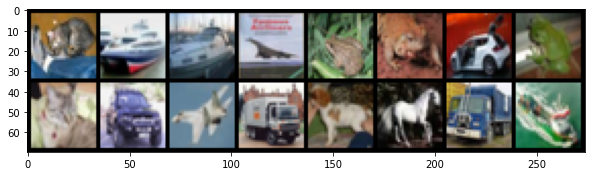

Reconstructed image


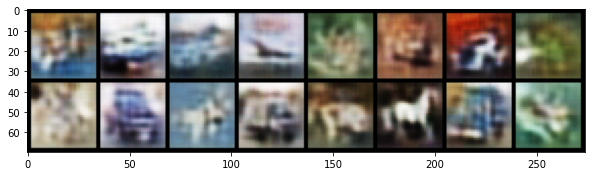

In [78]:
autoencoder2.cpu()
dataiter = iter(testloader)
images, labels = dataiter.next()
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder2(images)[1]
decoded_imgs = decoded_imgs.cpu()
imshow(torchvision.utils.make_grid(decoded_imgs.data))

In [79]:
# # encoder and decoder is fully connected layers
# class Autoencoder1(nn.Module):
#     def __init__(self):
#         super(Autoencoder1, self).__init__()
#         # Input size: [batch, 3, 32, 32]
#         # Output size: [batch, 3, 32, 32]
#         self.enc0 = nn.Linear(in_features=49152, out_features=3072)
#         self.enc1 = nn.Linear(in_features=3072, out_features=1024)
#         self.enc2 = nn.Linear(in_features=1024, out_features=512)
#         self.enc3 = nn.Linear(in_features=512, out_features=256)
#         self.enc4 = nn.Linear(in_features=256, out_features=64)
#         self.enc5 = nn.Linear(in_features=64, out_features=32)
        
#         self.dec1 = nn.Linear(in_features=32, out_features=64)
#         self.dec2 = nn.Linear(in_features=64, out_features=256)
#         self.dec3 = nn.Linear(in_features=256, out_features=512)
#         self.dec4 = nn.Linear(in_features=512, out_features=1024)
#         self.dec5 = nn.Linear(in_features=1024, out_features=3072)
#         self.dec6 = nn.Linear(in_features=3072, out_features=49152)

           
#         # self.decoder = 
#     def forward(self, x):
#       encoded = F.relu(self.enc0(x))
#       encoded = F.relu(self.enc1(x))
#       encoded = F.relu(self.enc2(x))
#       encoded = F.relu(self.enc3(x))
#       encoded = F.relu(self.enc4(x))
#       encoded = F.relu(self.enc5(x))
#       decoded = F.relu(self.dec1(x))
#       decoded = F.relu(self.dec2(x))
#       decoded = F.relu(self.dec3(x))
#       decoded = F.relu(self.dec4(x))
#       decoded = F.relu(self.dec5(x))
#       decoded = F.relu(self.dec6(x))


#       return encoded ,decoded
#       # encoded = self.encoder(x)
#       # decoded = self.decoder(encoded)
#       # return encoded, decoded


In [80]:
# def print_model(encoder, decoder):
#     print("############## Encoder ##############")
#     print(encoder)
#     print("############## Decoder ##############")
#     print(decoder)
#     print("")

# def create_model():
#   autoencoder = Autoencoder1()
#   # print_model(autoencoder.encoder, autoencoder.decoder)
#   return autoencoder

In [81]:
# autoencoder1 = create_model()
# criterion = nn.MSELoss()
# optimizer = optim.Adam(autoencoder1.parameters())

In [82]:
# for epoch in range(10):
#   running_loss = 0.0
#   for i, (inputs, _) in enumerate(trainloader, 0):
#     # inputs = Variable(inputs)
#     # inputs = inputs.flatten()
#     inputs=inputs
#     img = img.to(device)
#     img = img.view(img.size(0), -1)
#     optimizer.zero_grad()
#     outputs = net(img)
#     loss = criterion(outputs, img)
#     loss.backward()
#     optimizer.step()
#     running_loss += loss.item()

# 		# ============ Forward ============
#     encoded, outputs = autoencoder1(inputs)
#     loss = criterion(outputs, inputs)
# 		# ============ Backward ============
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

# 		# ============ Logging ============
#     running_loss += loss.data
#     if i % 2000 == 1999:
#       print('[%d, %5d] loss: %.3f' %
#             (epoch + 1, i + 1, running_loss / 2000))
#       running_loss = 0.0
	
# print('Finished Training')
# print('Saving Model...')
# torch.save(autoencoder.state_dict(), "autoencoder1.pt")

In [83]:
# autoencoder.load_state_dict(torch.load("/content/autoencoder1.pt"))

In [84]:
# dataiter = iter(testloader)
# images, labels = dataiter.next()
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
# imshow(torchvision.utils.make_grid(images))

# images = Variable(images)

# print("Reconstructed image")
# decoded_imgs = autoencoder(images)[1]
# imshow(torchvision.utils.make_grid(decoded_imgs.data))

In [85]:
# encoder and decoder is fully convolutional layers.

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6,16,kernel_size=5),
            nn.ReLU(True)
            # nn.Conv2d(3, 12, kernel_size=3, padding=1, stride=2), # 32x32 => 16x16
            # nn.ReLU(),
            # nn.Conv2d(12, 12, kernel_size=3, padding=1),
            # nn.ReLU(),
            # nn.Conv2d(12, 2*12, kernel_size=3, padding=1, stride=2), # 16x16 => 8x8
            # nn.ReLU(),
            # nn.Conv2d(2*12, 2*12, kernel_size=3, padding=1),
            # nn.ReLU(),
            # nn.Conv2d(2*12, 2*12, kernel_size=3, padding=1, stride=2), # 8x8 => 4x4
            # nn.ReLU(),
            # nn.Flatten(), # Image grid to single feature vector
            # nn.Linear(2*16*12, latent_dim)

            # Write your code here
            # nn.Conv2d(3, 12, 4, stride=2, padding=1),
            # nn.ReLU(),
            # nn.Conv2d(12, 12, kernel_size=4, padding=1),
            # act_fn(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.ConvTranspose2d(16,6,kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6,3,kernel_size=5),
            nn.ReLU(True)
            # nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            # nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [86]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [87]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU(inplace=True)
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): ConvTranspose2d(6, 3, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU(inplace=True)
)



### Training

In [88]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.014
[2,  2000] loss: 0.005
[3,  2000] loss: 0.004
[4,  2000] loss: 0.004
[5,  2000] loss: 0.004
[6,  2000] loss: 0.004
[7,  2000] loss: 0.004
[8,  2000] loss: 0.003
[9,  2000] loss: 0.003
[10,  2000] loss: 0.003
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [89]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


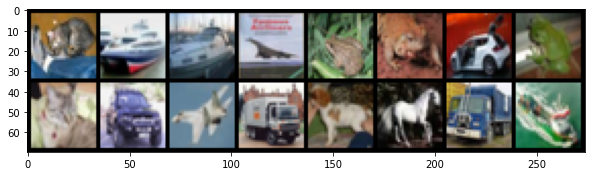

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed image


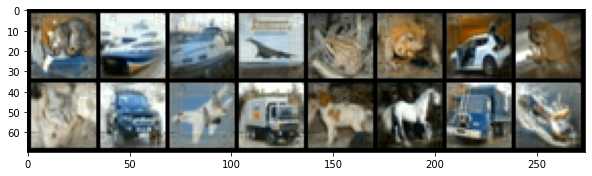

In [90]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
decoded_imgs = decoded_imgs.cpu()
imshow(torchvision.utils.make_grid(decoded_imgs.data))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

AutoEncoders are used in :  
1.   Image Compression
2.   Feature Extraction
3.   Dimensionality Reduction
4.   Image Denoising
5.   Image generation
6.   Recommendation system

Different types of the AutoEncoders are : 
1. Sparse Autoencoder
2. Deep Autoencoder
3. Denoising Autoencoder
4. Undercomplete Autoencoder
5. Contractive Autoencoder
6. Convolutional Autoencoder
7. Variational Autoencoder


####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).



1. Auto-encoders may express complex non-linear functions, despite the fact that PCA is essentially a linear transformation. 

2. PCA features are totally linearly uncorrelated since they are projections onto the orthogonal basis.Autoencoded features, on the other hand, may have correlations because they are solely trained for accurate reconstruction. 

3. Autoencoders are slower and more expensive to compute than PCA. 

4. PCA is quite similar to a single layered autoencoder with a linear activation function. 

5. Because of the large number of parameters, autoencoder is prone to overfitting.